# 1. Import libraries and load the dataset

In [46]:
import numpy as np
from numpy import newaxis
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, Activation
from keras import optimizers

from attention import Attention
from keras.models import Sequential
from keras import optimizers

In [47]:
df = pd.read_csv("./USDT.csv")
df1 = df.reset_index()['Price']
df1.head()

0    0.9999
1    0.9993
2    0.9998
3    0.9999
4    1.0000
Name: Price, dtype: float64

Data preprocessing

In [48]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

# 2. Split the data into training, test and validate  sets

In [49]:
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1213, 1)
Test shape: (606, 1)
Validate shape: (204, 1)


In [50]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1416, 1)
Test shape: (404, 1)
Validate shape: (203, 1)


In [51]:
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1213, 1)
Test shape: (404, 1)
Validate shape: (406, 1)


In [52]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [53]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
print(len(X_test))

303


In [54]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

# 3. Perform RNN-Attention Model

## 3.1 Build the RNN Attention Model

In [55]:
model = Sequential([
    SimpleRNN(100, return_sequences=True, input_shape=(time_step, 1)),
    Attention(),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 100, 100)          10200     
                                                                 
 attention_3 (Attention)     (None, 128)               35600     
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 49,961
Trainable params: 49,961
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
18/18 [==============================] - 4s 79ms/step - loss: 0.0286 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 2/200
18/18 [==============================] - 1s 49ms/step - loss: 7.9312e-04 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 3/200
18/18 [==============================] - 1s 44ms/step - loss: 2.1649e-04 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 4/200
18/18 [==============================] - 1s 48ms/step - loss: 1.3293e-04 - accuracy: 0.0000e+00 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 5/200
18/18 [==============================] - 1s 50ms/step - loss: 9.5266e-05 - accuracy: 0.0000e+00 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 6/200
18/18 [==============================] - 1s 45ms/step - loss: 8.7265e-05 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 7/200
18/18 [==============================] - 1s 41ms/step - loss: 8.5190

Epoch 54/200
18/18 [==============================] - 1s 39ms/step - loss: 1.1126e-04 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 55/200
18/18 [==============================] - 1s 39ms/step - loss: 9.6332e-05 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 56/200
18/18 [==============================] - 1s 40ms/step - loss: 7.5808e-05 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 57/200
18/18 [==============================] - 1s 44ms/step - loss: 1.2029e-04 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 58/200
18/18 [==============================] - 1s 42ms/step - loss: 7.8348e-05 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 59/200
18/18 [==============================] - 1s 44ms/step - loss: 9.5839e-05 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 60/200
18/18 [==============================] - 1s 46ms/step - l

Epoch 107/200
18/18 [==============================] - 1s 53ms/step - loss: 5.9445e-05 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 108/200
18/18 [==============================] - 1s 49ms/step - loss: 6.9417e-05 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 109/200
18/18 [==============================] - 1s 59ms/step - loss: 6.7602e-05 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 110/200
18/18 [==============================] - 1s 58ms/step - loss: 6.2966e-05 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 111/200
18/18 [==============================] - 1s 59ms/step - loss: 6.5501e-05 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 112/200
18/18 [==============================] - 1s 56ms/step - loss: 8.7979e-05 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 113/200
18/18 [==============================] - 1s 51ms/s

18/18 [==============================] - 1s 54ms/step - loss: 6.5365e-05 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 160/200
18/18 [==============================] - 1s 57ms/step - loss: 9.4772e-05 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 161/200
18/18 [==============================] - 1s 54ms/step - loss: 7.5249e-05 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 162/200
18/18 [==============================] - 1s 54ms/step - loss: 6.0850e-05 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 163/200
18/18 [==============================] - 1s 55ms/step - loss: 6.3346e-05 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 164/200
18/18 [==============================] - 1s 55ms/step - loss: 6.7360e-05 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 165/200
18/18 [==============================] - 1s 54ms/step - loss: 8.

In [57]:
def evaluate_rnn_attention_model(actual, X_data):
    y_pred = model.predict(X_data)
    mse = mean_squared_error(actual, y_pred)
    mae = mean_absolute_error(actual, y_pred)
    mape = mean_absolute_percentage_error(actual, y_pred)
    rmse = mean_squared_error(actual, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

## 3.2 Evaluate on Validate data

In [58]:
y_pred_val, val_mse, val_mae, val_mape, val_rmse = evaluate_rnn_attention_model(y_val, X_val)

10/10 [==============================] - 1s 13ms/step


## 3.3 Evaluate on Test data

In [59]:
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_rnn_attention_model(y_test, X_test)

10/10 [==============================] - 0s 14ms/step


In [60]:
train_predict = model.predict(X_train)
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_pred_val = scaler.inverse_transform(y_pred_val)

35/35 [==============================] - 1s 14ms/step


In [63]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=345
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input= x_input.reshape(1,-1)
        print("x_input:",x_input)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.45214106 0.4697733  0.45969773 0.49370277 0.50881612 0.51259446
 0.51511335 0.5163728  0.54911839 0.48992443 0.51133501 0.52141058
 0.53904282 0.45843829 0.50503778 0.49748111 0.3627204  0.34256927
 0.35264484 0.34508816 0.28967254 0.30352645 0.29219144 0.33501259
 0.17884131 0.08942065 0.0465995  0.07934509 0.32367758 0.37405542
 0.39168766 0.40302267 0.4093199  0.48992443 0.50755668 0.54911839
 0.5465995  0.52392947 0.54534005 0.54534005 0.52015113 0.5604534
 0.58312343 0.58690176 0.60075567 0.59319899 0.59193955 0.60957179
 0.60957179 0.61083123 0.60453401 0.60201511 0.61335013 0.72544081
 0.61209068 0.61209068 0.6209068  0.62216625 0.61838791 0.61460957
 0.59949622 0.60327456 0.59571788 0.60075567 0.62846348 0.6209068
 0.59949622 0.57808564 0.58312343 0.60327456 0.60453401 0.60075567
 0.62216625 0.61209068 0.60579345 0.60453401 0.6209068  0.61335013
 0.63098237 0.61586902 0.62468514 0.61838791 0.61335013 0.62972292
 0.62720403 0.64609572 0.6209068  0.61335013 0.63602

2 day output [[0.5304727]]
3 day input [0.49370277 0.50881612 0.51259446 0.51511335 0.5163728  0.54911839
 0.48992443 0.51133501 0.52141058 0.53904282 0.45843829 0.50503778
 0.49748111 0.3627204  0.34256927 0.35264484 0.34508816 0.28967254
 0.30352645 0.29219144 0.33501259 0.17884131 0.08942065 0.0465995
 0.07934509 0.32367758 0.37405542 0.39168766 0.40302267 0.4093199
 0.48992443 0.50755668 0.54911839 0.5465995  0.52392947 0.54534005
 0.54534005 0.52015113 0.5604534  0.58312343 0.58690176 0.60075567
 0.59319899 0.59193955 0.60957179 0.60957179 0.61083123 0.60453401
 0.60201511 0.61335013 0.72544081 0.61209068 0.61209068 0.6209068
 0.62216625 0.61838791 0.61460957 0.59949622 0.60327456 0.59571788
 0.60075567 0.62846348 0.6209068  0.59949622 0.57808564 0.58312343
 0.60327456 0.60453401 0.60075567 0.62216625 0.61209068 0.60579345
 0.60453401 0.6209068  0.61335013 0.63098237 0.61586902 0.62468514
 0.61838791 0.61335013 0.62972292 0.62720403 0.64609572 0.6209068
 0.61335013 0.63602015 0.64

5 day output [[0.6433888]]
6 day input [0.51511335 0.5163728  0.54911839 0.48992443 0.51133501 0.52141058
 0.53904282 0.45843829 0.50503778 0.49748111 0.3627204  0.34256927
 0.35264484 0.34508816 0.28967254 0.30352645 0.29219144 0.33501259
 0.17884131 0.08942065 0.0465995  0.07934509 0.32367758 0.37405542
 0.39168766 0.40302267 0.4093199  0.48992443 0.50755668 0.54911839
 0.5465995  0.52392947 0.54534005 0.54534005 0.52015113 0.5604534
 0.58312343 0.58690176 0.60075567 0.59319899 0.59193955 0.60957179
 0.60957179 0.61083123 0.60453401 0.60201511 0.61335013 0.72544081
 0.61209068 0.61209068 0.6209068  0.62216625 0.61838791 0.61460957
 0.59949622 0.60327456 0.59571788 0.60075567 0.62846348 0.6209068
 0.59949622 0.57808564 0.58312343 0.60327456 0.60453401 0.60075567
 0.62216625 0.61209068 0.60579345 0.60453401 0.6209068  0.61335013
 0.63098237 0.61586902 0.62468514 0.61838791 0.61335013 0.62972292
 0.62720403 0.64609572 0.6209068  0.61335013 0.63602015 0.64105793
 0.62216625 0.62216625 0.

8 day output [[0.59841424]]
9 day input [0.48992443 0.51133501 0.52141058 0.53904282 0.45843829 0.50503778
 0.49748111 0.3627204  0.34256927 0.35264484 0.34508816 0.28967254
 0.30352645 0.29219144 0.33501259 0.17884131 0.08942065 0.0465995
 0.07934509 0.32367758 0.37405542 0.39168766 0.40302267 0.4093199
 0.48992443 0.50755668 0.54911839 0.5465995  0.52392947 0.54534005
 0.54534005 0.52015113 0.5604534  0.58312343 0.58690176 0.60075567
 0.59319899 0.59193955 0.60957179 0.60957179 0.61083123 0.60453401
 0.60201511 0.61335013 0.72544081 0.61209068 0.61209068 0.6209068
 0.62216625 0.61838791 0.61460957 0.59949622 0.60327456 0.59571788
 0.60075567 0.62846348 0.6209068  0.59949622 0.57808564 0.58312343
 0.60327456 0.60453401 0.60075567 0.62216625 0.61209068 0.60579345
 0.60453401 0.6209068  0.61335013 0.63098237 0.61586902 0.62468514
 0.61838791 0.61335013 0.62972292 0.62720403 0.64609572 0.6209068
 0.61335013 0.63602015 0.64105793 0.62216625 0.62216625 0.63602015
 0.62594458 0.60957179 0.6

10 day output [[0.6362966]]
11 day input [0.52141058 0.53904282 0.45843829 0.50503778 0.49748111 0.3627204
 0.34256927 0.35264484 0.34508816 0.28967254 0.30352645 0.29219144
 0.33501259 0.17884131 0.08942065 0.0465995  0.07934509 0.32367758
 0.37405542 0.39168766 0.40302267 0.4093199  0.48992443 0.50755668
 0.54911839 0.5465995  0.52392947 0.54534005 0.54534005 0.52015113
 0.5604534  0.58312343 0.58690176 0.60075567 0.59319899 0.59193955
 0.60957179 0.60957179 0.61083123 0.60453401 0.60201511 0.61335013
 0.72544081 0.61209068 0.61209068 0.6209068  0.62216625 0.61838791
 0.61460957 0.59949622 0.60327456 0.59571788 0.60075567 0.62846348
 0.6209068  0.59949622 0.57808564 0.58312343 0.60327456 0.60453401
 0.60075567 0.62216625 0.61209068 0.60579345 0.60453401 0.6209068
 0.61335013 0.63098237 0.61586902 0.62468514 0.61838791 0.61335013
 0.62972292 0.62720403 0.64609572 0.6209068  0.61335013 0.63602015
 0.64105793 0.62216625 0.62216625 0.63602015 0.62594458 0.60957179
 0.62468514 0.61964736 

13 day output [[0.6212706]]
14 day input [0.50503778 0.49748111 0.3627204  0.34256927 0.35264484 0.34508816
 0.28967254 0.30352645 0.29219144 0.33501259 0.17884131 0.08942065
 0.0465995  0.07934509 0.32367758 0.37405542 0.39168766 0.40302267
 0.4093199  0.48992443 0.50755668 0.54911839 0.5465995  0.52392947
 0.54534005 0.54534005 0.52015113 0.5604534  0.58312343 0.58690176
 0.60075567 0.59319899 0.59193955 0.60957179 0.60957179 0.61083123
 0.60453401 0.60201511 0.61335013 0.72544081 0.61209068 0.61209068
 0.6209068  0.62216625 0.61838791 0.61460957 0.59949622 0.60327456
 0.59571788 0.60075567 0.62846348 0.6209068  0.59949622 0.57808564
 0.58312343 0.60327456 0.60453401 0.60075567 0.62216625 0.61209068
 0.60579345 0.60453401 0.6209068  0.61335013 0.63098237 0.61586902
 0.62468514 0.61838791 0.61335013 0.62972292 0.62720403 0.64609572
 0.6209068  0.61335013 0.63602015 0.64105793 0.62216625 0.62216625
 0.63602015 0.62594458 0.60957179 0.62468514 0.61964736 0.5906801
 0.61209068 0.60831234

15 day output [[0.61448807]]
16 day input [0.3627204  0.34256927 0.35264484 0.34508816 0.28967254 0.30352645
 0.29219144 0.33501259 0.17884131 0.08942065 0.0465995  0.07934509
 0.32367758 0.37405542 0.39168766 0.40302267 0.4093199  0.48992443
 0.50755668 0.54911839 0.5465995  0.52392947 0.54534005 0.54534005
 0.52015113 0.5604534  0.58312343 0.58690176 0.60075567 0.59319899
 0.59193955 0.60957179 0.60957179 0.61083123 0.60453401 0.60201511
 0.61335013 0.72544081 0.61209068 0.61209068 0.6209068  0.62216625
 0.61838791 0.61460957 0.59949622 0.60327456 0.59571788 0.60075567
 0.62846348 0.6209068  0.59949622 0.57808564 0.58312343 0.60327456
 0.60453401 0.60075567 0.62216625 0.61209068 0.60579345 0.60453401
 0.6209068  0.61335013 0.63098237 0.61586902 0.62468514 0.61838791
 0.61335013 0.62972292 0.62720403 0.64609572 0.6209068  0.61335013
 0.63602015 0.64105793 0.62216625 0.62216625 0.63602015 0.62594458
 0.60957179 0.62468514 0.61964736 0.5906801  0.61209068 0.60831234
 0.61083123 0.603274

18 day output [[0.57732815]]
19 day input [0.34508816 0.28967254 0.30352645 0.29219144 0.33501259 0.17884131
 0.08942065 0.0465995  0.07934509 0.32367758 0.37405542 0.39168766
 0.40302267 0.4093199  0.48992443 0.50755668 0.54911839 0.5465995
 0.52392947 0.54534005 0.54534005 0.52015113 0.5604534  0.58312343
 0.58690176 0.60075567 0.59319899 0.59193955 0.60957179 0.60957179
 0.61083123 0.60453401 0.60201511 0.61335013 0.72544081 0.61209068
 0.61209068 0.6209068  0.62216625 0.61838791 0.61460957 0.59949622
 0.60327456 0.59571788 0.60075567 0.62846348 0.6209068  0.59949622
 0.57808564 0.58312343 0.60327456 0.60453401 0.60075567 0.62216625
 0.61209068 0.60579345 0.60453401 0.6209068  0.61335013 0.63098237
 0.61586902 0.62468514 0.61838791 0.61335013 0.62972292 0.62720403
 0.64609572 0.6209068  0.61335013 0.63602015 0.64105793 0.62216625
 0.62216625 0.63602015 0.62594458 0.60957179 0.62468514 0.61964736
 0.5906801  0.61209068 0.60831234 0.61083123 0.60327456 0.61586902
 0.59823678 0.5881612

21 day output [[0.58153087]]
22 day input [0.29219144 0.33501259 0.17884131 0.08942065 0.0465995  0.07934509
 0.32367758 0.37405542 0.39168766 0.40302267 0.4093199  0.48992443
 0.50755668 0.54911839 0.5465995  0.52392947 0.54534005 0.54534005
 0.52015113 0.5604534  0.58312343 0.58690176 0.60075567 0.59319899
 0.59193955 0.60957179 0.60957179 0.61083123 0.60453401 0.60201511
 0.61335013 0.72544081 0.61209068 0.61209068 0.6209068  0.62216625
 0.61838791 0.61460957 0.59949622 0.60327456 0.59571788 0.60075567
 0.62846348 0.6209068  0.59949622 0.57808564 0.58312343 0.60327456
 0.60453401 0.60075567 0.62216625 0.61209068 0.60579345 0.60453401
 0.6209068  0.61335013 0.63098237 0.61586902 0.62468514 0.61838791
 0.61335013 0.62972292 0.62720403 0.64609572 0.6209068  0.61335013
 0.63602015 0.64105793 0.62216625 0.62216625 0.63602015 0.62594458
 0.60957179 0.62468514 0.61964736 0.5906801  0.61209068 0.60831234
 0.61083123 0.60327456 0.61586902 0.59823678 0.58816121 0.6209068
 0.60327456 0.6183879

24 day output [[0.6066061]]
25 day input [0.08942065 0.0465995  0.07934509 0.32367758 0.37405542 0.39168766
 0.40302267 0.4093199  0.48992443 0.50755668 0.54911839 0.5465995
 0.52392947 0.54534005 0.54534005 0.52015113 0.5604534  0.58312343
 0.58690176 0.60075567 0.59319899 0.59193955 0.60957179 0.60957179
 0.61083123 0.60453401 0.60201511 0.61335013 0.72544081 0.61209068
 0.61209068 0.6209068  0.62216625 0.61838791 0.61460957 0.59949622
 0.60327456 0.59571788 0.60075567 0.62846348 0.6209068  0.59949622
 0.57808564 0.58312343 0.60327456 0.60453401 0.60075567 0.62216625
 0.61209068 0.60579345 0.60453401 0.6209068  0.61335013 0.63098237
 0.61586902 0.62468514 0.61838791 0.61335013 0.62972292 0.62720403
 0.64609572 0.6209068  0.61335013 0.63602015 0.64105793 0.62216625
 0.62216625 0.63602015 0.62594458 0.60957179 0.62468514 0.61964736
 0.5906801  0.61209068 0.60831234 0.61083123 0.60327456 0.61586902
 0.59823678 0.58816121 0.6209068  0.60327456 0.61838791 0.60957179
 0.59823678 0.59823678

27 day output [[0.63892263]]
28 day input [0.32367758 0.37405542 0.39168766 0.40302267 0.4093199  0.48992443
 0.50755668 0.54911839 0.5465995  0.52392947 0.54534005 0.54534005
 0.52015113 0.5604534  0.58312343 0.58690176 0.60075567 0.59319899
 0.59193955 0.60957179 0.60957179 0.61083123 0.60453401 0.60201511
 0.61335013 0.72544081 0.61209068 0.61209068 0.6209068  0.62216625
 0.61838791 0.61460957 0.59949622 0.60327456 0.59571788 0.60075567
 0.62846348 0.6209068  0.59949622 0.57808564 0.58312343 0.60327456
 0.60453401 0.60075567 0.62216625 0.61209068 0.60579345 0.60453401
 0.6209068  0.61335013 0.63098237 0.61586902 0.62468514 0.61838791
 0.61335013 0.62972292 0.62720403 0.64609572 0.6209068  0.61335013
 0.63602015 0.64105793 0.62216625 0.62216625 0.63602015 0.62594458
 0.60957179 0.62468514 0.61964736 0.5906801  0.61209068 0.60831234
 0.61083123 0.60327456 0.61586902 0.59823678 0.58816121 0.6209068
 0.60327456 0.61838791 0.60957179 0.59823678 0.59823678 0.59445844
 0.6070529  0.6196473

29 day output [[0.63202584]]


In [62]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

acc = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(acc)

               MSE       MAE      MAPE      RMSE
Validate  0.004502  0.043656  0.068841  0.067100
Test      0.001648  0.025873  0.040683  0.040592


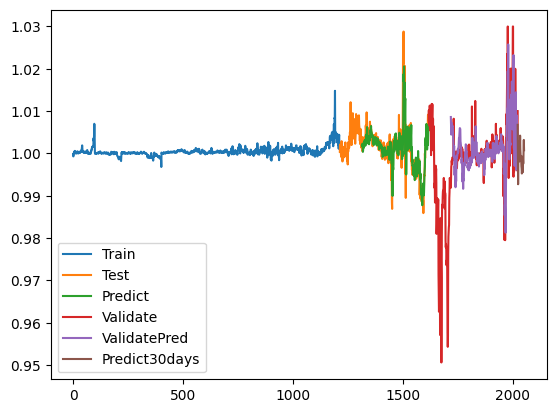

In [64]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred_test))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()